<a href="https://colab.research.google.com/github/MWSteams/4590FSP/blob/master/Rapid_Mix_Flocculation_Mechanical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rapid-Mix and Flocculation Mechanical

Authors: Ariel Ben-Sorek, Lynn Li, and Allison Tran

[/Monroe/]: # (See my email for general comments.)

In [43]:
!pip install aguaclara
!pip install molmass

In [44]:
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import molmass as mol
!wget https://raw.githubusercontent.com/MWSteams/4590FSP/master/Fairmont.py
import Fairmont as fmt
import math

--2020-05-18 18:26:56--  https://raw.githubusercontent.com/MWSteams/4590FSP/master/Fairmont.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3057 (3.0K) [text/plain]
Saving to: ‘Fairmont.py.5’

Fairmont.py.5       100%[===================>]   2.99K  --.-KB/s    in 0s      

2020-05-18 18:26:57 (47.7 MB/s) - ‘Fairmont.py.5’ saved [3057/3057]



# Task Definition

Our task was to evaluate both processes of mechanical rapid mix and mechanical flocculation, in order to determine the most effective methods for distributing coagulant for mixing and floc formation for the Fairmont Sedimentation Plant. In a standard water treatment train, rapid mix occurs between coagulant addition and flocculation, and provides an enhanced method of distributing coagulant evenly through the water. Flocculation is a method to coagulate contaminant particles together for easy removal through sedimentation or filtration, and is an instrumental part of the water treatment train. Our goal is to optimize both treatment processes at the Fairmont Sedimentation Plant through modifying parameters such as tank volume, residence time, and flocculator blades, to maximize the amount of contaminant removed through flocculation against maintenance and operation costs.

# Executive Summary 

Regarding both rapid-mix and flocculation, we will be using energy dissipation rates and velocity gradients as the main constraints to figure out how effectively coagulant is being distributed in our system via mechanical mixing, as well how effectively the coagulant is working to form flocs.

Focusing more specifically on design,  we recommend a pump diffusor as our mechanical rapid-mix mechanism. For mechanical flocculation, we will be using rotating blade flocculators. We have not yet determined whether or not we want to implement horizontal or vertical blade flocculators. Regardless of the orientation of the blades, we recommend using three flocculation units as well as an additional unit for redundancy. Each flocculation unit will be further divided into three flocculation chambers, which will each operate using a unique velocity gradient in order to create a tapered velocity gradient profile. A high-to-low velocity gradient in subsequent flocculation compartments will create dense flocs, as well as reduce the total retention time for all three units. This velocity gradient will be determined by the turbidity of the flow, as well as chosen to minimize energy and operation costs.

From the scope of work (SOW) of the Fairmont Sedimentation Plant, the influent turbidity is 23 NTU with a final turbidity goal of 3 NTU. Due to the classification of the incoming and outgoing turbidity of the water, the tapered velocity gradient profile would be 180/s, 70/s, and 20/s for each flocculation compartment of each unit, in order. This would mean a total operating cost of $978.60 per day for all three flocculation units, given the incoming plant flow. 

The SOW for the Fairmont Sedimentation Plant shows an available space of 200ft by 125ft for the flocculator. We are assuming that the width of the flocculator will occupy as much of the square footage as possible, leaving about 25m as a buffer space. We are also assuming a tank depth of 4m, modeled after the Aguaclara mechanical flocculators. This means that the length of each compartment of the flocculator would be 22.3 meters, and the width of each flocculator compartment would be 10.16 meters. Using these values, the diameter of the impeller of the flocculator would be 6.803 meters and the speed of the impellers would be 6.738 revolutions per minute.

[/Monroe/]: # (Mixing coagulant uniformly with the raw water before splitting the flow into multiple treatment trains might be one of the goals of rapid mix in this plant. I suspect that your design will not be influenced in any way by knowing the contaminant that controls the coagulant dosage because we don't have a physics-based model for the design of the rapid mix. See https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Derivations.html#turbulent-large-scale-eddies for mixing length estimates. Note that you would want to include a safety factor on these equations.)


# Constraints

* Relevant Regulations


* Client Expectations
    * Redundancy plan (at least one backup unit for both rapid mix and floccculation)


* Site and Budget
    * Mechcanical mechanisms require a power input which then adds to operation costs
    * Rapid mix mechanical is one of the most energy intensive units in treatment train
    * 200ft*125ft is the proposed rapid mix and flocculation on the plant diagram in the SOW
    

* Process Capabilities Including Process Design Equations
    * Residence time will determine the required volume of rapid-mix


* Ease of Use
    * Static mixers are simple and reliable but they are prone to clogging (MWH)


* Operation Requirements
    * If there are multiple treatment trains, parallel treatment trains must receive the same concentration of coagulant; coagulant must be mixed equally if rapid mix units are before flow splitting
    * Type of coagulant used/dosage
    * The optimal pH for aluminum coagulant nanoparticle formation is between pH of 6.5 and 8.5. Adding coagulant usually reduces pH so somtimes it is necessary to add a base to increase the pH of the raw water
    * pH in the 4.4 to 6 range is optimal for flocculation
    * High temperature accelerates the flocculation process (flocculation may be slower in the winter and therefore operators may need to allow for more time when the temp is colder)


* Maintenance Requirements
    * Needs to be easy to clean
    * Parts that can be easily bought and replaced
    * Vertical shaft rotating blades don't require underwater bearings where as horizonal shaft rotating blades do


[/Monroe/]: # (Quote from Benjamin and Lawler [https://newcatalog.library.cornell.edu/catalog/8516026] page 546: "While much research remains to be done on the interactions of chemicals, paricles, and mixing, the emerging picture at this point is tha ta high degree of turbulence leads to more efficient chemical use for destabilization by adsorption and charge neutralization, whereas destabilization by precipitation is less sensitive to the mixing conditions." My understanding is that drinking water treatment plants use destabilization by precipitation; the only mechanism that we have been able to replicate in our labs here at Cornell. We now recognize that it isn't destabilization, but rather is simply that the coagulant nanoparticles are sticky.)


# Physics

$$G=\frac{\Delta v}{\Delta h}$$

where $G$ is the velocity gradient, $\Delta v$ is the difference in velocity between two points on two different streamlines and $\Delta h$ is the distance between the streamlines.

G is a measure of how quickly one point of water along one streamline moves in comparison to another point on a different streamline.

$$\varepsilon = G^2 \nu$$ 

where $\epsilon$ is the energy dissipation rate, $G$ is the velocity gradient, and $\nu$ is the kinematic viscosity of water.

It is hypotheiszed that it's ultimately velocity gradients that transport coagulant nanoparticles to the surface of particles.

$$P = \rho \bar G^2 \nu Q \theta$$ 

where $P$ is power input required, $\rho$ is density of water, $Q$ is the flow rate, and $\theta$ is the hydraulic residence time.

This equation can be used to estimate electrical motor sizing requirements for mechanical rapid mix units.

$$\lambda_\nu = \Pi_{K\nu}\left( \frac{\nu^3}{\varepsilon} \right)^{\frac{1}{4}}$$

where $\lambda_\nu$ is the inner viscous length scale, $\Pi_{K\nu}=5-$, $\nu$ is the kinematic viscosity of water, and $\epsilon$ is the energy dissipation rate.

"At length scales larger than the inner viscous length scale the dominant transport mechanism is by turbulent eddies. At length scales smaller than the inner viscous length scale the dominant transport mechanism is fluid deformation due to shear." (AguaClara) This equations strongly suggests that the coagulant nanoparticles are not transported to the clay surfaces in the short amount of time spent in the rapid mix.

[/Monroe/]: # (The previous equation needs to be combined with an estimate of the diffusion length scale for the coagulant nanoparticles. In any case that equation strongly suggests that the coagulant nanoparticles are not transported to the clay surfaces in the short amount of time spent in the rapid mix.)
[/Lynn/]: # (Added)

[/Monroe/]: # (Another equation is the eddy turnover time
https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Derivations.html#equation-rapid-mix-rm-derivations-38)
[/Ariel/]: # (Added)

We can calculate the volume of water being mixed by assuming the length of the mixing zone is $L=1.5D$, where D is the diameter of the pipe. According to the SOW, the diameter is 87 inches, or 2.2098 meters.
Thus, mixing time $t=\frac{V}{L}$



# Table Listing Potential Strategies to Meet the Constraints and Treatment Objectives

| strategies | advantages | disadvantages | data needed for decision |
| ---------- | ---------- | ---------- | ---------- |
| Reducing energy used to power mechanical mixers | Lower cost, lower electricity usage | Less power to mixers affects energy dissipation, velocity, residence time, and more | Power usage typical for mechanical rapid mix |
| Modifying coagulant dosage to ensure removal of arsenic | Meet water treatment plant standards for arsenic removal | Rapid mix can be expensive (coagulant and electricity to power mixers) | Coagulant dosage needed to remove certain concentration of arsenic, cost of powering rapid mixers
| Modifying coagulant dosage to ensure even distribution | Increased coagulant will remove more contaminant (arsenic) | Increased coagulant will be more expensive | Type of coagulant used, velocity gradient, ideal dosage, residence time of mixer |
|Horizontal Rotating Blades| More simple compartmentalization, different tapered G values are produced for one particular drive shaft rotational speed| Requires underwater bearings| Flocculation performance|
|Vertical Rotating Blades| Do not require underwater bearings| A much wider diversity of G values within the flocculation basin for a given mean velocity gradient| Flocculation performance|
|Flocculator tank size|Larger tanks result in a longer residence time for flocs|Possible increase in maintenance/operation costs for larger tanks| Flocculation performance using tanks of various sizes|

# Vendors and Contact Information File

[/Monroe/]: # (Excellent work finding some suppliers)

In [45]:
vendors = pd.read_csv('https://raw.githubusercontent.com/MWSteams/4590FSP/master/vendors.txt',sep='\t')
vendors

,item description,vendor,contact first name,contact last name,vendor website,product info,date of contact,who made the contact,notes
0,plate settlers,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/literaturemedia/...,4/16/2020,Ian Cullings,NaN
1,sludge removal system,MRI,still,pending,http://www.meurerresearch.com/,http://www.meurerresearch.com/products/hoseles...,4/16/2020,Ian Cullings,NaN
2,plate settlers,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,https://www.monroeenvironmental.com/water-and-...,4/16/2020,Ian Cullings,NaN
3,sludge removal system,Monore Environmental,still,pending,https://www.monroeenvironmental.com/,http://www.monroeenvironmental.com/water-and-w...,4/16/2020,Ian Cullings,NaN
4,plate settler with hopper,Parkson,still,pending,https://www.parkson.com/,https://www.parkson.com/products/lamella-ecoflow,4/16/2020,Ian Cullings,Includes sloped sludge hopper in design
5,rapid mixer (mech),Dynamix,still,pending,https://www.dynamixinc.com,https://www.dynamixinc.com/industries/waste-wa...,4/16/2020,Lynn Li,NaN
6,rapid mixer (mech),Meurer Research,still,pending,http://www.meurerresearch.com,http://www.meurerresearch.com/products/mixer/,4/16/2020,Lynn Li,NaN
7,rapid mixer (mech),Philadelphia Mixing Solutions,still,pending,https://www.philamixers.com,https://www.philamixers.com/industries/water-w...,4/16/20,Lynn Li,NaN
8,flocculator (mech),Sereco,still,pending,http://www.sereco.it/,https://www.directindustry.com/prod/sereco/pro...,05/04/2020,Lynn Li,NaN
9,decanter centrifuge (resid) GN Solids Control...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Shared Assumptions

See this [python file, Fairmont.py](https://github.com/monroews/4590FSP/blob/master/Fairmont.py)

We are creating our model for flocculation on the assumption that the main constituents for removal by flocculation are arsenic and dissolved organic matter. Rapid mixing before flocculation will determine the degree of removal by flocs.

[/Monroe/]: # (Rewrite this now that you recall that rapid mix doesn't remove anything.)

[/Monroe/]: # (You can also create a range of rapid mix volumes, power requirements, and annual operating costs for standard designs for rapid mix units. Those preliminary designs are trivial and will help give insight for goal of reducing the energy footprint of this facility.)

Preliminary assumptions we will be making involve associated costs, such as costs for powering the mixers and operation and maintenance costs for each treatment process. As we begin to develop the code for each process, we will decide on which variables we will be changing and which will be assumed to be fixed.

# Major Decisions

### Rapid-Mix

1. First, we need to determine the number of treatment trains that would be adequate to handle the large flow of the Fairmont Sedimentation Plant. Unfortunately, there is no way to calculate this number exactly and therefore we will be using an estimation of 3 that was determined with the help of Monroe Weber-Shirk. This means that the flow through each individual rapid-mix mechancial unit will be 1/3 of the total plant flow.

2. Next, we would hypothetically determine the residence time for the mechanical rapid-mix units. For a typical mechanical vertical-shaft mixer along with other various rapid-mix systems the residence time would be provided by its manufactuer. If not, it can be assumed to be around 1 minute based off of the literature that we have read (provided in the resources section) and consultation with Monroe Weber-Shirk. However, since we've decided on a pump diffusion system for our particular design, there is no need for a residence time.

3. After the residence time has been determined, we then need to determine a G value. This G value will also have to be an estimate found from prior case studies as well as consultations from professional engineers. This G value will later go on to help us find the diameter of the conal jet.

4. Once the jet size is determined, we will then use this value to find the energy/power required of the pump to produce this jet.

5. Finally, we will use this power value to determine operation costs given typical LA industiral electricity prices. Additionally, we can use the power value to find a head value in order to better visualize how energy is being consumed by the entire rapid-mix mechanical process.

### Flocculation

1. Like rapid-mix mechancial, the first step of the design process would be to determine the number of treatment trains required to handle the flow of the Fairmont Sedimentation Plant. Again, we will be using an estimation of 3 that was also determined with the help of Monroe Weber-Shirk. To reiterate, this means that the flow through each individual rapid-mix mechancial unit will be 1/3 of the total plant flow.

2. Next, we would determine the residence time for the flocculators. Unlike rapid-mix, the residence time of the flocculators can be varied by changing the flocculator tank size. Using literature and consulations, we will assume a residence time of 20 min for each flocculation unit. We will compartementalize these individual flocculation units into three chambers of decending G values that will therefore each have a residence time of 20/3 min. Compartmentalizing flocculator units is standard for the flocculation process because it creates denser flocs.

3. The next step then would be to determine an array for the 3 different G values for the 3 chambers of each flocculation unit. These G values would be dependent on incoming turbidity.

4. Lastly, we will be using the design values to find the energy/power required to run our mechanical flocculators which can then be used to determine operation costs given typical LA industiral electricity prices.

# Future Avenues

Given various time and data constraints, there are limitations to our proposed design which should be explored in the future for more accurate results.

Regarding mechanical rapid-mix, we only considered a flash-pump mechanism even though there are many other mechancial rapid-mix options which will affect both operating and captial cost as well as efficiency. We've also estimated a G value which might not actually be the optimal G value for this system design. In addition, it would be worth looking into a standard static in line mixer to see how it compares with our chosen design. It would also be interesting to look into chemical costs and compare these to operating costs of a rapid-mix unit to see if it would be more financially feasible to add in more coagulant versus implimenting a rapid-mix unit. 

On a similar note, as we've metioned before, there is also a lot to discover about the rapid-mix process itself. More case studies need to be done in exisiting water treatment facilities to determine whether or not rapid-mix is actually integral to the entire water treatment process. Most of this stems from the fact that "we do not yet understand the origin of the bonds that form between coagulant nanoparticles, between a coagulant nanoparticle and a suspented particles, and between coagulant nanoparticles and dissolved organic molecules" (Aguaclara).

Regarding mechanical flocculation, we mainly focused on the optimal velocity gradients for each flocculation unit, taking into account the turbidity of the incoming flow as well as the energy and operation costs of the flocculator. However, removing turbidity is not the only goal of a mechanical flocculator, which can also be used for removing dissolved organic matter and chemical contaminants. Therefore, we can build on top of the code we have already written to take into account other contaminants in the incoming flow, and how removal of these contaminants via flocculation would affect the chosen velocity gradients for the flocculation compartments. 

Lastly, in regard to our code, a future avenue for this design code would be to make this code interactive so that it's not just one dimensional and calculating various outputs given very specific inputs. It would be really interesting to see if code can be developed to calculate number of flocculator/rapid-mix treatment trains are required given a variety of inputs.

# Design



![Proposed Plan View Area](https://github.com/MWSteams/4590FSP/raw/master/Images/Rapid_Mix_Mechanical/rm_floc_mech_final_plan.jpg)

![Proposed Flocculator](https://github.com/MWSteams/4590FSP/raw/master/Images/Rapid_Mix_Mechanical/floc_mech.jpg)

![Pumped Flash Mixer](https://github.com/MWSteams/4590FSP/raw/Rapid_Mix_Mechanical/pump1.PNG)

In [0]:
## Givens

specific_energy = (fmt.electricity_power/fmt.q_ave).to(u.J/u.L)
temp = 15 * u.degC
specific_potential_energy = (specific_energy / u.gravity / ac.density_water(temp)).to(u.m)
fsp_flow = fmt.q_max.to(u.Mgal/u.day)
rm_num_trains = 3

#Adjusting pH (operating at an optimum pOH mitigates the need to shift optimum pH based on temp)
#pkW = (0.01760*temp.to(u.degK))+(4470.99/temp.to(u.degK))-6.0875
#pH + pOH = pKW

## Constants (random by Monroe)
fmt.n_rm_mech #4 units (one for redunancy)
fmt.L_rm_mech #3m
fmt.W_rm_mech #3m

fmt.n_floc_mech #4 units
fmt.L_floc_mech #10m
fmt.W_floc_mech #10m

elec_price_la = 0.1173*((u.USD)/(u.kW*u.hr)) #average industrial electricity rate in Los Angeles

#print('The average flow to be treated at Fairmont is',fmt.q_ave.to(u.Mgal/u.day),'or')
#print('The maximum flow to be treated at Fairmont is',fmt.q_max.to(u.Mgal/u.day))
#print('The average amount of energy used per liter of water is expected to be',specific_energy,'or',specific_potential_energy,'of potential energy')

We can assume the pump flow rate is approximately 3% of plant flow rate, based on the rule-of-thumb provided by Kawamura's manual *Integrated Design of Water Treatment Facilities* (p. 95), as well as his principle that rapid mix units have a volume of mixing approximately 1.5 times the diameter of the pipe where it occurs. Combined with some geometry, we get the following results:

In [0]:
## Rapid-Mix Mechanical

# Diameter of rapid mix injection pipe given in SOW
diameter_rm_mech_pipe = 87 * u.inch
rapid_mix_length_ratio = 1.5
length_in_rm = rapid_mix_length_ratio * diameter_rm_mech_pipe

volume_rm_mech = np.pi*diameter_rm_mech_pipe**2*length_in_rm/4
injection_time = (volume_rm_mech) / fsp_flow

# We can assume the pump flow rate is approximately 3% of plant flow rate, 
# and we can divide by the number of treatment trains later to get a full picture
rm_mech_pump_flow_ratio = 0.03
rm_mech_pump_flow = fsp_flow * rm_mech_pump_flow_ratio

rm_num_pumps_per_train = 1
# Kawamura p. 95 and MWH p. 377 both recommend one nozzle to avoid clogging.
# More pumps/nozzles per train can be added easily by changing this value.
rm_total_pumps = rm_num_trains * rm_num_pumps_per_train

rm_mech_flow_per_pump = rm_mech_pump_flow / rm_total_pumps


Based on the above, we now know the volume of water that is being pumped by the rapid-mix system at any time.

We will be assuming a velocity gradient in the rapid mix system of 700 Hz. This is the industry-standard range (Kawamura p. 94)
This can be used to determine the power required for the rapid mix pumps. 

$$P=G^{2} 2 \mu V$$

Next, we can take the pumping volume determined above, $Q_{pump}$, and compute hydraulic head with the following formula:

$$E_{mix}= \frac{g*Q_{pump}*\rho*H}{e} $$


In [48]:
# Compute hydraulic head by plugging in mixing energy assuming pump efficiency = 1:
# Temporary velocity gradient for now to verify equations work
rm_velocity_gradient = 700 / u.s
rm_mech_pump_energy_total = rm_velocity_gradient**2 * ac.viscosity_dynamic_water(temp)* volume_rm_mech
rm_mech_energy_per_pump = rm_mech_pump_energy_total/rm_total_pumps
print('The total energy required for rapid mix pumps is', rm_mech_pump_energy_total.to(u.kW), 'with each pump requiring ',rm_mech_energy_per_pump.to(u.kW) )
efficiency_rm_mech_pump = 1
hydraulic_head_rm_mech = rm_mech_pump_energy_total * efficiency_rm_mech_pump / (u.gravity  * ac.density_water(temp) * rm_mech_pump_flow)
print('The total hydraulic head of the rapid mix pumps is ', hydraulic_head_rm_mech.to(u.m))


The total energy required for rapid mix pumps is 7.076 kilowatt with each pump requiring  2.359 kilowatt
The total hydraulic head of the rapid mix pumps is  1.181 meter


Because we know that $H=\frac{v^2}{2g}$, we can solve for viscosity with the hydraulic head H that we just determined:
$$v = \sqrt{2gH}$$

After solving for viscosity, one can solve for the required diameter of the rapid mix nozzles like so:
$$d= \sqrt\frac{4Q_{pump}}{\pi \nu} $$

In [49]:
# Solve for viscosity:
viscosity_kinematic_rm_mech = np.sqrt(2*u.gravity*hydraulic_head_rm_mech)

# Required diameter:
diamter_rm_mech_injection = np.sqrt(4*rm_mech_flow_per_pump/(np.pi*viscosity_kinematic_rm_mech))
print('The diameter of each jet orifice is',diamter_rm_mech_injection.to(u.centimeter) )

The diameter of each jet orifice is 23.23 centimeter


Using mass conservation, we know that the flow into a pipe must equal the flow out of a pipe. Because flow $Q=A*v$, where A is area of the pipe and v is velocity, we can solve for the velocity out of the pipes.

In [50]:

# Mass Conservation
area_rm_mech_injection = diamter_rm_mech_injection**2 * np.pi / 4
velocity_rm_injection = (rm_mech_flow_per_pump / area_rm_mech_injection).to(u.m/u.s)
print('The velocity from each jet is',velocity_rm_injection)


The velocity from each jet is 4.812 meter / second



Lastly, we can solve for the operating cost using the energy of the pump that was determined above and the price of electricity at the facility.

In [51]:
# Operation Cost
daily_elec_rm_mech = (rm_mech_pump_energy_total*(24*u.hr)).to(u.kW*u.hr)
daily_cost_rm_mech = daily_elec_rm_mech*elec_price_la
print('The daily electricity cost to run rapid mix is', daily_cost_rm_mech, '.')

The daily electricity cost to run rapid mix is 19.92 dollar .


**Mechanical Flocculation**

The velocity gradient (G) will depend on the incoming turbidity of the water. We wanted to create a graph of the energy requirement needed to meet the corresponding velociy gradient in the mechanical flocculator. We were given a range of values of the velocity gradient dependent on turbidity, and we also assumed parameters such as the residence time for each of the 3 flocculation units, the incoming flow rate of the water, and the temperature of the water in the flocculator. Each unit of the flocculator is further divided into 3 flocculation compartments. 

In [0]:
rm_num_trains = 3

# assuming the residence time for each compartment of each flocculation unit
residence_time_floc_mech = (20/rm_num_trains)*u.min 

# Given parameters for each flocculation unit
floc_flow = fsp_flow/rm_num_trains
floc_temp = 15 * u.degC

We used this table from the Aguaclara textbook to create an array of possible velocity gradient values, given the incoming turbidity.

|Type|Velocity gradient (G) (1/s)|Energy dissipation rate|Gt|t (min)|
|----|----|----|----|----|
|Low turbidity, color removal|20-70|0.4-4.9|50,000-250,000|11-210|
|High turbidity, solids removal|70-180|4.9-32|80,000-190,000|7-45|

Using the range of velocity gradient values, we solve for the corresponding average energy dissipation rate of each velocity gradient value.

Equation for energy dissipation rate: $\bar \varepsilon = \nu G_{CS}^2$

In [0]:
# Creating an array with the range of velocity gradient values 
G_mech = []

for x in range(20,180):
  G_mech.append(x)

G_mech = G_mech * (1/u.s)

# Solving for an array of Gt values given the velocity gradients
Gt_mech = []

for x in range(len(G_mech)):
  Gt_mech.append((G_mech[x] * residence_time_floc_mech).to(u.dimensionless))

# Calculating the equivalent average energy dissipation rate for the range of 
# velocity gradients (for each compartment of each flocculation unit)
energy_dis_rate = []

for x in range(len(G_mech)):
  energy_dis_rate.append((G_mech[x]**2 * ac.viscosity_kinematic_water(floc_temp)).to(u.mW/u.kg))

Once we solved for the energy dissipation rate of each velocity gradient value, we solved for the corresponding power and energy requirement for that energy dissipation rate.

Equation for shaft power: $P = \nu Qt_{res}G^2$

In [0]:
# Calculating power requirement for the compartments
power_floc = []

def power_floc_shaft(Q,G,t,temp):
  return ((G**2 * Q * t * ac.viscosity_dynamic_water(temp)).to(u.kW))

for x in range(len(G_mech)):
  power_floc.append(power_floc_shaft(floc_flow, G_mech[x], residence_time_floc_mech, floc_temp))

# Solving for the energy requirement for each compartment given the power of the 
# flocculator unit
def energy_mech(Q,G,t,temp):
  return(((power_floc_shaft(Q,G,t,temp))/Q).to(u.J/u.L))

energy_req = []

for x in range(len(G_mech)):
  energy_req.append((energy_mech(floc_flow, G_mech[x], residence_time_floc_mech, 
                                 floc_temp)).magnitude)

energy_req = energy_req * (u.J/u.L)

Assuming the cost of electricity in Los Angeles, we were able to solve for the total cost of electricity for all 3 flocculation units and plotted this cost against the range of velocity gradient values.

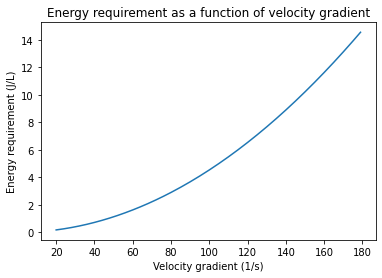

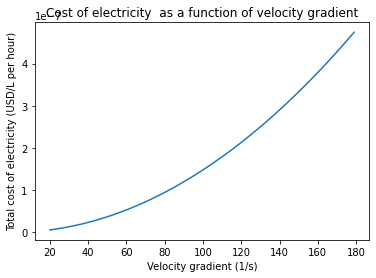

The total cost of operating this tapered velocity gradient profile for each flocculation unit would be 5.555e-07 dollar / liter per hour. That means the daily cost of operating all three mechanical flocculator units would be 978.6 dollar / day
The power required for the first compartment of each flocculator unit would be 1.362 kilowatt
The power required for the second compartment of each flocculator unit would be 15.57 kilowatt
The power required for the third compartment of each flocculator unit would be 98.94 kilowatt


In [55]:
# Solving for the total cost of electricity per hour for all 3 flocculation units
total_energy_cost = []

for x in range(len(G_mech)):
  total_energy_cost.append(((elec_price_la * energy_req[x]).to(u.USD/u.L)).magnitude)

total_energy_cost = total_energy_cost * (u.USD/u.L)

# Plot the energy requirement as a function of the possible velocity gradient values
plt.plot(G_mech, energy_req)
plt.xlabel('Velocity gradient (1/s)') 
plt.ylabel('Energy requirement (J/L)') 
plt.title('Energy requirement as a function of velocity gradient') 
plt.show()

plt.plot(G_mech, total_energy_cost)
plt.xlabel('Velocity gradient (1/s)')
plt.ylabel('Total cost of electricity (USD/L per hour)')
plt.title('Cost of electricity  as a function of velocity gradient')
plt.show()


# Solving for the cost of operation given the high-to-low velocity gradient for each flocculation unit
total_energy_cost_actual= total_energy_cost[1] + total_energy_cost[51] + total_energy_cost[159]

daily_total_energy_cost_actual = (total_energy_cost_actual * rm_num_trains * floc_flow).to(u.USD/u.day)

print('The total cost of operating this tapered velocity gradient profile for each flocculation unit would be', total_energy_cost_actual,'per hour. That means the daily cost of operating all three mechanical flocculator units would be', daily_total_energy_cost_actual)

print('The power required for the first compartment of each flocculator unit would be', power_floc[1])
print('The power required for the second compartment of each flocculator unit would be', power_floc[51])
print('The power required for the third compartment of each flocculator unit would be', power_floc[159])

From the SOW, the influent turbidity is 23 NTU, which is classified as very high turbidity (using values provided by the Aguaclara textbook). The turbidity goal is 3 NTU, which is classified as low turbidity and an acceptable turbidity for treated water. Therefore, the velocity gradient of the first flocculation chamber in each unit must be between 70-180 (1/s), and the velocity gradient of the third flocculation chamber in each unit must be between 20-70 (1/s). Given this information, we estimate that the tapered velocity gradient profile for each flocculation unit will be 180/s for the first compartment, 70/s for the second compartment, and 20/s for the third compartment. 

Using the incoming flow rate, we can solve for the volume (assuming a flocculator depth of 4m, same as the Aguaclara mechanical flocculators).

In [56]:
# Solving for the volume of each individual flocculation unit 
floc_volume = (residence_time_floc_mech * floc_flow).to(u.m**3)

# Assuming that the flocculator depth is 4m, same as the Aguaclara mechanical flocculators 
floc_depth = 4 * u.m 

floc_area = (floc_volume / floc_depth).to(u.m**2)
total_floc_area = (floc_area*rm_num_trains)

print('The required area for the flocculator would be',total_floc_area,'. Given that the available area in the Fairmont plant is 200ft by 125ft, there would be adequate space to accomodate a flocculator of this depth.')

The required area for the flocculator would be 2039 meter ** 2 . Given that the available area in the Fairmont plant is 200ft by 125ft, there would be adequate space to accomodate a flocculator of this depth.


To solve for the flocculator dimensions, we see that the width of the given area for the flocculator is 125ft according to the plant layout in the SOW. We will assume that the flocculator occupies this entire width, with about 25 ft as a buffer space. Knowing this, we can solve for the length and width of each flocculator compartment.

In [57]:
floc_width = (125-25) * u.ft
floc_compartment_width = (floc_width/rm_num_trains).to(u.m)
floc_compartment_length = ((total_floc_area/floc_width)/rm_num_trains).to(u.m)

print('The length of each flocculator compartment would be', floc_compartment_length, 'and the width of each flocculator compartment would be', floc_compartment_width)

The length of each flocculator compartment would be 22.3 meter and the width of each flocculator compartment would be 10.16 meter


In order to solve for the impeller diameter and impeller speed, the tank diameter value must be calculated using the length and width of each flocculation compartment. The ratio of impeller diameter to tank diameter for a vertical shaft flocculator is between 0.35 to 0.40, so we will assume a ratio of 0.40.

Equation for tank diameter: $T_{e}=1.13(L * W)^{0.5}$

Equation for impeller diameter: $I_{D}/T_{E} = 0.40$

In [0]:
imp_diam_to_tank_diam = 0.40
tank_diameter = 1.13 * ((floc_compartment_length * floc_compartment_width)**0.5)
imp_diam = tank_diameter * imp_diam_to_tank_diam

Using the diameter of the impeller, we can solve for the impeller speed. We are assuming a value for the maximum impeller speed, which varies depending on the type of blade used in the flocculator and ranges from 2.1 to 2.4 meters per second. We will assume a value of 2.4 meters per second for the maximum impeller tip speed and use this to solve for the impeller speed in revolutions per minute.

In [59]:
max_tip_speed = 2.4 * (u.m/u.s)

# Converting meters per second to radians per second

max_tip_speed_rad = (max_tip_speed/(imp_diam/2)).to(u.rad/u.sec)

# Converting radians per second to revolutions per minute

impeller_speed = (max_tip_speed_rad).to(u.revolution/u.min)

print('The diameter of the impeller would be', imp_diam, 'and the speed of the impeller would be',impeller_speed)

The diameter of the impeller would be 6.803 meter and the speed of the impeller would be 6.738 turn / minute


# References

https://aguaclara.github.io/Textbook/Rapid_Mix/RM_Intro.html

https://education.seattlepi.com/flocculation-wastewater-4866.html

https://www.iwapublishing.com/news/coagulation-and-flocculation-water-and-wastewater-treatment

https://www.electricitylocal.com/states/california/los-angeles/

http://literature.puertoricosupplier.com/017/IU17190.pdf